In [22]:
pip install pycountry

     |████████████████████████████████| 10.1 MB 1.1 MB/s eta 0:00:01
  Created wheel for pycountry: filename=pycountry-20.7.3-py2.py3-none-any.whl size=10746863 sha256=5119ddd5bd8f086bba6bd0944139aa7cad38a8e8e2da825fe495e0c5200d8485
  Stored in directory: /Users/heatherjohansen/Library/Caches/pip/wheels/09/eb/0d/4ee773c6a4aadc2a43cb5c1d07f268f13c4cdc0eec88e7c1ef
Successfully built pycountry
Note: you may need to restart the kernel to use updated packages.


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import pycountry

import sys
import resource, sys


In [4]:
cd ..

/Users/heatherjohansen/Desktop/dsi/Projects/Mass-Protests


In [140]:
mass = pd.read_csv('./data/mass_mobile.csv')
mass.reset_index(drop=True, inplace=True) 
mass_nc = pd.read_csv('./data/03_mass_no_country.csv')

In [149]:
mass_nc['violent_count'].value_counts()

0    13287
1     1288
2      545
3       59
Name: violent_count, dtype: int64

In [147]:
mass.drop(columns='Unnamed: 0', inplace=True)

In [143]:
mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15179 entries, 0 to 15178
Columns: 234 entries, id to protest_duration
dtypes: float64(10), int64(212), object(12)
memory usage: 27.1+ MB


In [8]:
mass['num_state_responses'] = mass['arrests'] + mass['accomodation'] + mass['beatings'] + mass['crowddispersal'] + mass['ignore'] + mass['killings'] + mass['shootings']

In [17]:
mass = mass[mass['num_state_responses'] != 0]

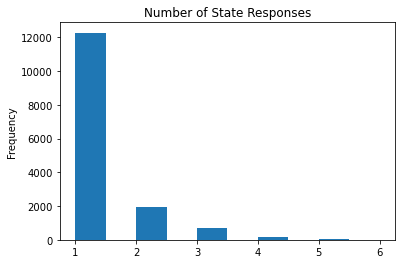

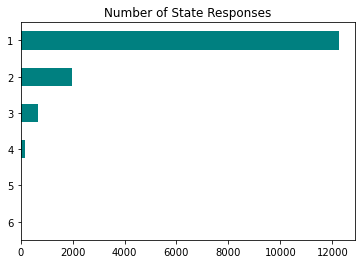

In [18]:
mass['num_state_responses'].plot(kind='hist', title='Number of State Responses')
plt.show();

# ordered_categories = ['0', '1', '2', '3',  '4', '5', '6']
# protest_cats = pd.DataFrame(mass.protest_size_category.value_counts())
# protest_cats = protest_cats.reindex(ordered_categories)
# fig_dims = (10, 6)
# fig, ax = plt.subplots(figsize=fig_dims)
# ax = sns.barplot(x=protest_cats.index, y = 'protest_size_category' , data=protest_cats, ax=ax, palette='coolwarm')
# ax.set_title("Protest Size Categories",fontsize=20)
# ax.set_xlabel("Protest Size",fontsize=15)
# ax.set_ylabel("Number of Particpants",fontsize=15)
# ax.tick_params(labelsize=10)

mass['num_state_responses'].value_counts().sort_values().plot(kind='barh', color='teal', title='Number of State Responses')
plt.show();

In [120]:
mass_map = mass[['country', 'country_alpha3', 'arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings']]

In [122]:
mass_map = mass_map.groupby(['country', 'country_alpha3']).sum()

In [124]:
mass_map.to_csv('./data/mass_map_state_resp_freq.csv')

In [150]:
list(mass_nc.columns)

['id',
 'country',
 'ccode',
 'region',
 'protestnumber',
 'protesterviolence',
 'location',
 'protesteridentity',
 'sources',
 'notes',
 'protester_id_type',
 'partipants_number',
 'protest_size_category',
 'pop_male',
 'pop_female',
 'pop_total',
 'pop_density',
 'prosperity_2020',
 'region_Africa',
 'region_Asia',
 'region_Central America',
 'region_Europe',
 'region_MENA',
 'region_North America',
 'region_Oceania',
 'region_South America',
 'protest_size_category_1,000-4,999',
 'protest_size_category_10,000-100,000',
 'protest_size_category_100-999',
 'protest_size_category_5,000-9,999',
 'protest_size_category_50-99',
 'protest_size_category_Less than 50',
 'protest_size_category_Over 100,000',
 'protester_id_type_civil_human_rights',
 'protester_id_type_ethnic_group',
 'protester_id_type_locals_residents',
 'protester_id_type_pensioners_retirees',
 'protester_id_type_political_group',
 'protester_id_type_prisoners',
 'protester_id_type_protestors_generic',
 'protester_id_type_re

In [184]:
mass_charts = mass_nc[['country', 
#                    'country_alpha3', 
                    'region', 
#                     'protesterviolence', 
                    'protester_id_type', 
                    'partipants_number', 
#                     'protest_size_category', 
#                     'protest_size_category_Less than 50',
#                     'protest_size_category_50-99',
#                     'protest_size_category_100-999',
#                     'protest_size_category_1,000-4,999',
#                     'protest_size_category_5,000-9,999',
#                     'protest_size_category_10,000-100,000',
#                     'protest_size_category_Over 100,000',
#                     'pop_density', 
#                     'pop_total', 
#                     'prosperity_2020', 
#                     'labor_wage_dispute',
#                     'land_farm_issue', 
#                     'police_brutality', 
#                     'political_behavior_process', 
#                     'price increases_tax_policy',
#                     'removal_of_politician',
#                     'social_restrictions',
#                     'arrests', 
#                     'accomodation', 
#                     'beatings', 
#                     'crowddispersal', 
#                     'ignore', 
#                     'killings', 
#                     'shootings', 
#                     'protest_duration', 
#                     'violent_response', 
#                     'violent_count'
                   ]]

In [185]:
mass_charts

,country,region,protester_id_type,partipants_number
0,Canada,North America,workers_unions,1000
1,Canada,North America,students_youth,1000
2,Canada,North America,political_group,500
3,Canada,North America,ethnic_group,100
4,Canada,North America,locals_residents,950
...,...,...,...,...
15174,Papua New Guinea,Oceania,locals_residents,100
15175,Papua New Guinea,Oceania,students_youth,1000
15176,Papua New Guinea,Oceania,political_group,50
15177,Papua New Guinea,Oceania,political_group,50


In [186]:
mass_charts_protID = mass_charts.groupby(['region','country', 'protester_id_type']).count()

In [188]:
mass_charts_protID.to_csv('./data/mass_charts_protID.csv')

In [126]:
pycountries

[Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia'),
 Country(alpha_2='AS', alpha_3='ASM', nam

In [129]:
# generate country code based on country name 

def alpha3code(column):
    country_alpha3=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            country_alpha3.append(code)
        except:
            pass        
            try:
                code=pycountry.countries.get(common_name=country).alpha_3
                country_alpha3.append(code)
            except:
                pass 
                try:
                    code=pycountry.countries.get(official_name=country).alpha_3
                    country_alpha3.append(code)
                except:
                    country_alpha3.append(country)

    return country_alpha3

In [130]:
# create a column for code 
mass['country_alpha3']=alpha3code(mass['country'])
mass.head()


,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,notes,...,start_date,end_date,target,notes_clean,neg,neu,pos,compound,num_state_responses,country_alpha3
0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,canada s railway passenger system was finally ...,...,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.000,-0.8176,1,CAN
1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,protestors were only identified as young peopl...,...,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.000,0.0000,1,CAN
2,201990003,Canada,20,North America,3,0.0,"Montreal, Quebec",separatist parti quebecois,1. quebec protest after queen calls for unity ...,"the queen, after calling on canadians to remai...",...,1990-07-01,1990-07-01,"[0, 0, 0, 0, 1, 0, 0]","the queen, after calling on canadians to remai...",0.060,0.830,0.109,0.7003,1,CAN
3,201990004,Canada,20,North America,4,1.0,"Montreal, Quebec",mohawk indians,1. indians gather as siege intensifies; armed ...,canada s federal government has agreed to acqu...,...,1990-07-12,1990-09-06,"[0, 1, 0, 0, 0, 0, 0]",canada s federal government has agreed to acqu...,0.134,0.820,0.046,-0.9711,1,CAN
4,201990005,Canada,20,North America,5,1.0,"Montreal, Quebec",local residents,1. dozens hurt in mohawk blockade protest the ...,protests were directed against the state due t...,...,1990-08-14,1990-08-15,"[1, 1, 0, 1, 0, 0, 0]",protests were directed against the state due t...,0.226,0.677,0.098,-0.5267,3,CAN


In [112]:
mass['country_alpha3'].value_counts(dropna=False)

None    1394
GBR      577
FRA      546
IRL      431
DEU      364
        ... 
TKM        4
LUX        3
ERI        3
SSD        1
QAT        1
Name: country_alpha3, Length: 144, dtype: int64

In [132]:
mass2 = mass[['country', 'country_alpha3']][mass['country_alpha3'] == 'None']

In [133]:
mass2.groupby(['country', 'country_alpha3']).count()

,
country,country_alpha3


In [88]:
mass[mass['country_alpha3'] == 'None'].groupby('country').count().index

Index(['Bosnia', 'Cape Verde', 'Congo Brazzaville', 'Congo Kinshasa',
       'Czechoslovakia', 'Germany East', 'Germany West', 'Iran', 'Ivory Coast',
       'Kosovo', 'Laos', 'Macedonia', 'North Korea', 'Russia',
       'Serbia and Montenegro', 'South Korea', 'Swaziland', 'Syria',
       'Timor Leste', 'USSR', 'United Arab Emirate', 'Yugoslavia'],
      dtype='object', name='country')

In [108]:
pycountries = list(pycountry.countries)

In [109]:
pycountries

[Country(alpha_2='AW', alpha_3='ABW', name='Aruba', numeric='533'),
 Country(alpha_2='AF', alpha_3='AFG', name='Afghanistan', numeric='004', official_name='Islamic Republic of Afghanistan'),
 Country(alpha_2='AO', alpha_3='AGO', name='Angola', numeric='024', official_name='Republic of Angola'),
 Country(alpha_2='AI', alpha_3='AIA', name='Anguilla', numeric='660'),
 Country(alpha_2='AX', alpha_3='ALA', name='Åland Islands', numeric='248'),
 Country(alpha_2='AL', alpha_3='ALB', name='Albania', numeric='008', official_name='Republic of Albania'),
 Country(alpha_2='AD', alpha_3='AND', name='Andorra', numeric='020', official_name='Principality of Andorra'),
 Country(alpha_2='AE', alpha_3='ARE', name='United Arab Emirates', numeric='784'),
 Country(alpha_2='AR', alpha_3='ARG', name='Argentina', numeric='032', official_name='Argentine Republic'),
 Country(alpha_2='AM', alpha_3='ARM', name='Armenia', numeric='051', official_name='Republic of Armenia'),
 Country(alpha_2='AS', alpha_3='ASM', nam